####  (IF540-AL) Machine Learning 

##### Kelompok 1  

Areta Escalonia Candra (00000057872)

Auliyaa Vishhwakarma Hestia (00000059515)

Kelsha Aira Meylie (00000064613)

Yustira Nhisya Shabilla (00000063592)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# from google.colab import files

# uploaded = files.upload()


https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera/

In [3]:
file_path = 'Data_Tanaman_Padi_Sumatera_version_1.csv'

df = pd.read_csv(file_path)
print(df)


    Provinsi  Tahun    Produksi  Luas Panen  Curah hujan  Kelembapan  \
0       Aceh   1993  1329536.00   323589.00       1627.0       82.00   
1       Aceh   1994  1299699.00   329041.00       1521.0       82.12   
2       Aceh   1995  1382905.00   339253.00       1476.0       82.72   
3       Aceh   1996  1419128.00   348223.00       1557.0       83.00   
4       Aceh   1997  1368074.00   337561.00       1339.0       82.46   
..       ...    ...         ...         ...          ...         ...   
219  Lampung   2016  3831923.00   390799.00       2317.6       79.40   
220  Lampung   2017  4090654.00   396559.00       1825.1       77.04   
221  Lampung   2018  2488641.91   511940.93       1385.8       76.05   
222  Lampung   2019  2164089.33   464103.42       1706.4       78.03   
223  Lampung   2020  2604913.29   545149.05       2211.3       75.80   

     Suhu rata-rata  
0             26.06  
1             26.92  
2             26.27  
3             26.08  
4             26.31  
.. 

In [4]:
mask = (df['Tahun'] >= 1993) & (df['Tahun'] <= 2014)

df.drop(df[mask].index, inplace=True)

print(df)

             Provinsi  Tahun    Produksi  Luas Panen  Curah hujan  Kelembapan  \
22               Aceh   2015  1956940.00   461060.00      1575.00       80.00   
23               Aceh   2016  2180754.00   293067.00      1096.00       83.32   
24               Aceh   2017  2478922.00   294483.00      1905.90       85.57   
25               Aceh   2018  1751996.94   329515.78      1427.80       83.98   
26               Aceh   2019  1714437.60   310012.46      1931.40       83.90   
27               Aceh   2020  1861567.10   317869.41      1619.20       80.82   
50     Sumatera Utara   2015  4044829.00   781769.00       975.90       86.90   
51     Sumatera Utara   2016  4387035.90   423029.00      2384.00       82.00   
52     Sumatera Utara   2017  4669777.50   415675.00      3190.00       84.00   
53     Sumatera Utara   2018  2108284.72   408176.45      2431.00       80.00   
54     Sumatera Utara   2019  2078901.59   413141.24      1401.60       86.53   
55     Sumatera Utara   2020

In [5]:
# Statistik Deskriptif
print("Statistik Deskriptif Data Cuaca:")
print(df.describe())

Statistik Deskriptif Data Cuaca:
             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count    48.000000  4.800000e+01      48.000000    48.000000   48.000000   
mean   2017.500000  1.920532e+06  312538.824792  2346.100625   81.651458   
std       1.725898  1.449199e+06  219689.235157   994.225363    3.386956   
min    2015.000000  2.308740e+05   63142.040000   327.330000   71.220000   
25%    2016.000000  5.045938e+05   85845.242500  1653.700000   79.875000   
50%    2017.500000  1.909254e+06  310841.845000  2143.950000   82.225000   
75%    2019.000000  2.627904e+06  461820.855000  2747.400000   83.855000   
max    2020.000000  4.881089e+06  872737.000000  4757.500000   87.730000   

       Suhu rata-rata  
count       48.000000  
mean        26.446667  
std          1.036579  
min         22.190000  
25%         26.230000  
50%         26.645000  
75%         27.007500  
max         27.700000  


In [6]:
print("\nStatistik Deskriptif Data Pertanian Padi:")
print(df['Produksi'].describe())


Statistik Deskriptif Data Pertanian Padi:
count    4.800000e+01
mean     1.920532e+06
std      1.449199e+06
min      2.308740e+05
25%      5.045938e+05
50%      1.909254e+06
75%      2.627904e+06
max      4.881089e+06
Name: Produksi, dtype: float64


In [7]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df[['Suhu rata-rata', 'Curah hujan', 'Kelembapan', 'Produksi']]

scaler = MinMaxScaler()

df_scaled_minmax = scaler.fit_transform(numeric_cols)

df_scaled_minmax = pd.DataFrame(df_scaled_minmax, columns=['Suhu rata-rata', 'Curah hujan', 'Kelembapan', 'Produksi'])

df_scaled_minmax = pd.concat([df[['Provinsi', 'Tahun']], df_scaled_minmax], axis=1)

print(df_scaled_minmax)


   Provinsi   Tahun  Suhu rata-rata  Curah hujan  Kelembapan  Produksi
22     Aceh  2015.0        0.856624     0.289147    0.760145  0.000000
23     Aceh  2016.0        0.678766     0.509590    0.640824  0.008273
24     Aceh  2017.0        0.872958     0.308695    0.658995  0.066795
25     Aceh  2018.0        0.843920     0.265243    0.764385  0.088431
26     Aceh  2019.0        0.803993     0.421173    0.755300  0.096179
..      ...     ...             ...          ...         ...       ...
43      NaN     NaN        0.773140     0.449254    0.495457  0.774383
44      NaN     NaN        0.756806     0.338084    0.352514  0.830022
45      NaN     NaN        0.600726     0.238923    0.292550  0.485519
46      NaN     NaN        0.914701     0.311291    0.412477  0.415726
47      NaN     NaN        0.433757     0.425259    0.277408  0.510522

[90 rows x 6 columns]


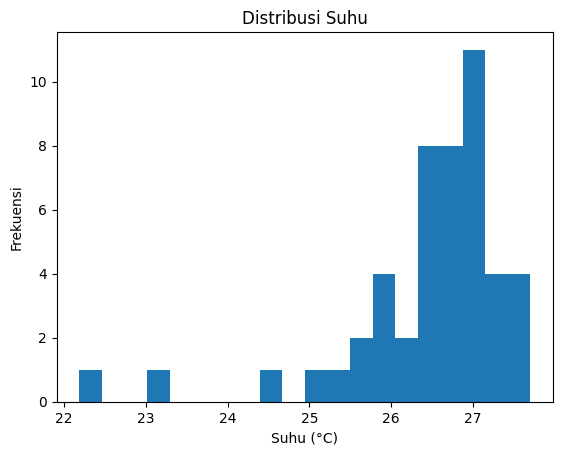

In [8]:
# Visualisasi Data
# Histogram suhu
plt.hist(df['Suhu rata-rata'], bins=20)
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Suhu')
plt.show()

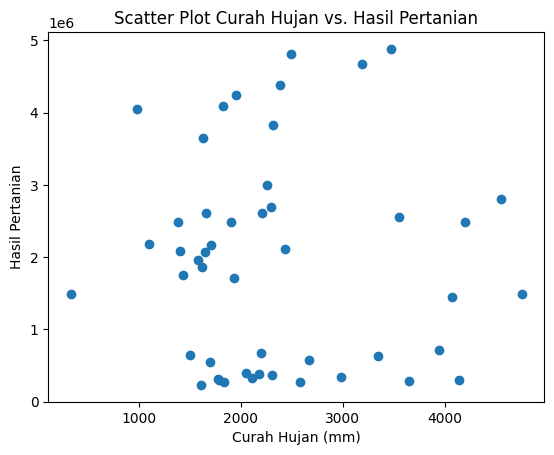

In [9]:
# Scatter plot curah hujan vs. hasil pertanian
plt.scatter(df['Curah hujan'], df['Produksi'])
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Hasil Pertanian')
plt.title('Scatter Plot Curah Hujan vs. Hasil Pertanian')
plt.show()

In [10]:
# Korelasi antara Curah Hujan dan Hasil Pertanian
correlation_ch_hp = df['Curah hujan'].corr(df['Produksi'])
print(f"Korelasi antara Curah Hujan dan Hasil Pertanian: {correlation_ch_hp}")

Korelasi antara Curah Hujan dan Hasil Pertanian: -0.0313018701072217


In [11]:
# Bagi data menjadi data latih dan data uji
X = df[['Suhu rata-rata', 'Curah hujan', 'Kelembapan']]
y = df['Produksi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df is your DataFrame
X = df[['Suhu rata-rata', 'Curah hujan', 'Kelembapan']]
y = df['Produksi']

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada seluruh dataset
model.fit(X, y)

# Lakukan prediksi pada seluruh dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error on the entire dataset: {mse}')


Mean Squared Error on the entire dataset: 1920787755376.6726


In [12]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [13]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2092436461981.5728
Mean Absolute Error (MAE): 1356596.9289644186
R-squared (R2): -0.6619489704543591


In [14]:
# Prediksi hasil pertanian untuk cuaca tertentu
new_data = pd.DataFrame({'Suhu rata-rata': [30], 'Curah hujan': [100], 'Kelembapan': [70]})
predicted_result = model.predict(new_data)
print(f"Prediksi Hasil Pertanian: {predicted_result[0]}")

Prediksi Hasil Pertanian: 4289309.329530813


In [15]:
data_produksi_provinsi = df[['Provinsi', 'Tahun', 'Produksi']]
print(data_produksi_provinsi)


             Provinsi  Tahun    Produksi
22               Aceh   2015  1956940.00
23               Aceh   2016  2180754.00
24               Aceh   2017  2478922.00
25               Aceh   2018  1751996.94
26               Aceh   2019  1714437.60
27               Aceh   2020  1861567.10
50     Sumatera Utara   2015  4044829.00
51     Sumatera Utara   2016  4387035.90
52     Sumatera Utara   2017  4669777.50
53     Sumatera Utara   2018  2108284.72
54     Sumatera Utara   2019  2078901.59
55     Sumatera Utara   2020  2076280.01
78     Sumatera Barat   2015  2550609.00
79     Sumatera Barat   2016  2487929.00
80     Sumatera Barat   2017  2810425.00
81     Sumatera Barat   2018  1483076.48
82     Sumatera Barat   2019  1482996.01
83     Sumatera Barat   2020  1450839.74
106              Riau   2015   393917.00
107              Riau   2016   325826.00
108              Riau   2017   337421.00
109              Riau   2018   266375.53
110              Riau   2019   230873.97
111             

In [16]:
correlation_ch_hp = df['Curah hujan'].corr(df['Produksi'])
print(f"Korelasi antara Curah Hujan dan Hasil Pertanian: {correlation_ch_hp}")

Korelasi antara Curah Hujan dan Hasil Pertanian: -0.0313018701072217


In [17]:
correlation_suhu_hp = df['Suhu rata-rata'].corr(df['Produksi'])
print(f"Korelasi antara Suhu dan Hasil Pertanian: {correlation_suhu_hp}")

Korelasi antara Suhu dan Hasil Pertanian: 0.10291714035963943


In [18]:
correlation_kelembapan_hp = df['Kelembapan'].corr(df['Produksi'])
print(f"Korelasi antara Kelembapan dan Hasil Pertanian: {correlation_kelembapan_hp}")

Korelasi antara Kelembapan dan Hasil Pertanian: -0.13367316025061113


Korelasi antara Curah Hujan dan Suhu: -0.4339678361486974


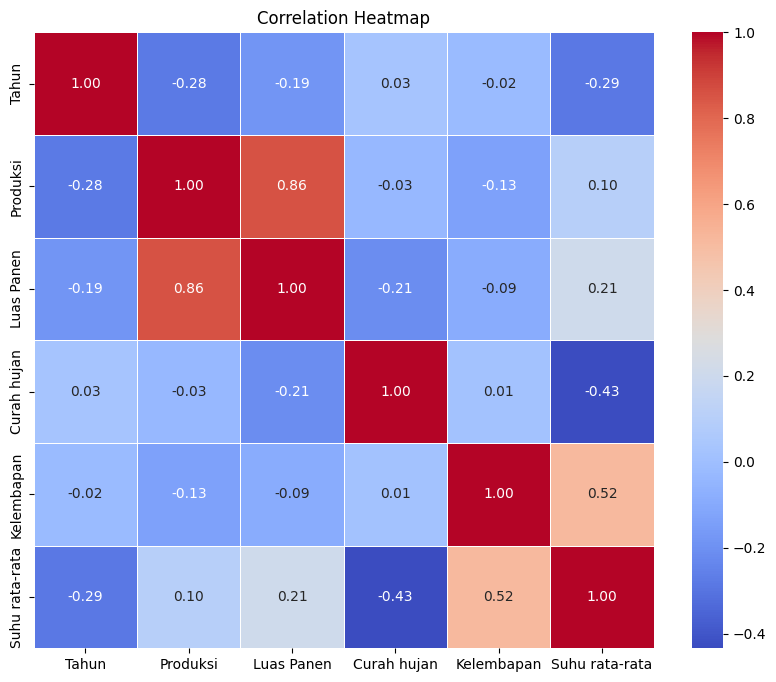

In [19]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [20]:
# Menentukan musim berdasarkan analisis korelasi
# Misalnya, jika suhu tinggi berkorelasi positif dengan produksi, itu bisa dianggap sebagai musim panas.

# Menentukan korelasi antara suhu rata-rata dan produksi
correlation_temp_production = df['Suhu rata-rata'].corr(df['Produksi'])

# Menentukan kategori musim berdasarkan korelasi
if correlation_temp_production > 0:
    # Jika korelasi positif, maka dapat dianggap sebagai musim panas
    df['Musim'] = 'Summer'
elif correlation_temp_production < 0:
    # Jika korelasi negatif, maka dapat dianggap sebagai musim hujan
    df['Musim'] = 'Rainy'
else:
    # Jika korelasi tidak positif atau negatif, bisa dianggap sebagai musim lainnya atau tidak dapat ditentukan
    df['Musim'] = 'Other/Undefined'

# Menampilkan data dengan kolom musim baru
print(df[['Provinsi', 'Tahun', 'Produksi', 'Suhu rata-rata', 'Musim']])


             Provinsi  Tahun    Produksi  Suhu rata-rata   Musim
22               Aceh   2015  1956940.00           27.10  Summer
23               Aceh   2016  2180754.00           27.12  Summer
24               Aceh   2017  2478922.00           26.51  Summer
25               Aceh   2018  1751996.94           26.48  Summer
26               Aceh   2019  1714437.60           26.65  Summer
27               Aceh   2020  1861567.10           25.41  Summer
50     Sumatera Utara   2015  4044829.00           27.40  Summer
51     Sumatera Utara   2016  4387035.90           27.65  Summer
52     Sumatera Utara   2017  4669777.50           27.50  Summer
53     Sumatera Utara   2018  2108284.72           26.41  Summer
54     Sumatera Utara   2019  2078901.59           27.03  Summer
55     Sumatera Utara   2020  2076280.01           25.79  Summer
78     Sumatera Barat   2015  2550609.00           26.50  Summer
79     Sumatera Barat   2016  2487929.00           23.26  Summer
80     Sumatera Barat   2

In [21]:
# Tabel kontingensi antara musim dan provinsi
contingency_table = pd.crosstab(df['Musim'], df['Provinsi'])
print(contingency_table)


Provinsi  Aceh  Bengkulu  Jambi  Lampung  Riau  Sumatera Barat  \
Musim                                                            
Summer       6         6      6        6     6               6   

Provinsi  Sumatera Selatan  Sumatera Utara  
Musim                                       
Summer                   6               6  


In [22]:
# Statistik deskriptif untuk setiap kategori musim
summary_stats = df.groupby('Musim')['Produksi'].describe()
print(summary_stats)


        count          mean           std        min        25%         50%  \
Musim                                                                         
Summer   48.0  1.920532e+06  1.449199e+06  230873.97  504593.75  1909253.55   

                 75%        max  
Musim                            
Summer  2.627904e+06  4881089.0  


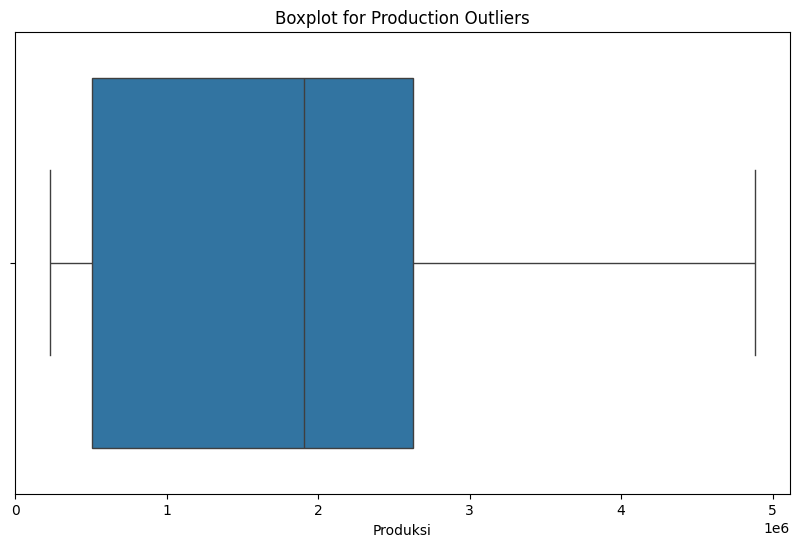

In [23]:
# Analisis outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Produksi'])
plt.title('Boxplot for Production Outliers')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Scaling variabel numerik
numeric_cols = df[['Suhu rata-rata', 'Curah hujan', 'Kelembapan']]
scaled_data = scaler.fit_transform(numeric_cols)
df_scaled = pd.DataFrame(scaled_data, columns=['Suhu rata-rata', 'Curah hujan', 'Kelembapan'])

# Gabungkan data yang telah discaling dengan kolom non-numerik
df_scaled = pd.concat([df[['Provinsi', 'Tahun', 'Produksi']], df_scaled], axis=1)


In [25]:
!jupyter nbconvert --to html "./01_UAS_IF540L_Gsl2023_2024.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./01_UAS_IF540L_Gsl2023_2024.ipynb to html
[NbConvertApp] Writing 692314 bytes to 01_UAS_IF540L_Gsl2023_2024.html
